In [84]:
import pandas as pd

In [85]:
import numpy as np

In [86]:
import matplotlib.pyplot as plt

In [87]:
import seaborn as sns

In [88]:
data = pd.read_csv(r"D:\EDM\internship\Bank_details.csv")

In [89]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [91]:
data.duplicated('CustomerId').sum()

0

In [92]:
data = data.set_index('CustomerId')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Endoding

In [94]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [95]:
data.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace= True)

In [96]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [97]:
data.replace({'Gender':{'Male':0, 'Female':1}}, inplace= True)

In [98]:
data['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [99]:
data.replace({'Num Of Products':{1: 0, 2:1, 3:1, 4:1}}, inplace = True)

In [100]:
data['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [101]:
data['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [102]:
data.loc[(data['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [103]:
data['Zero Balance'] = np.where(data['Balance']>0, 1, 0)

<Axes: >

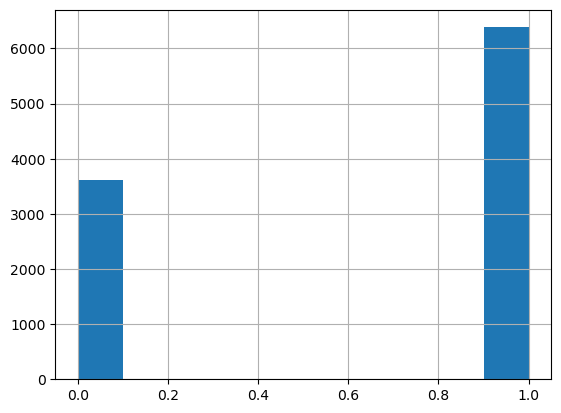

In [104]:
data['Zero Balance'].hist()

In [105]:
data.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Label and Features

In [106]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [107]:
X = data.drop(['Surname','Churn'], axis = 1)

In [108]:
y = data['Churn']

In [109]:
X.shape, y.shape

((10000, 11), (10000,))

In [110]:
data['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

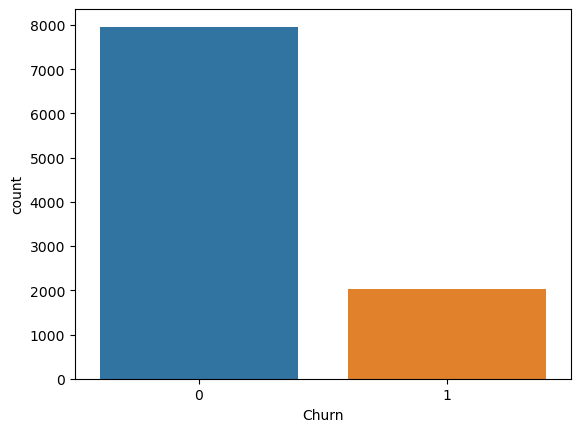

In [111]:
sns.countplot(x = 'Churn', data = data);

In [112]:
X.shape, y.shape

((10000, 11), (10000,))

# Random Under Sampling

In [113]:
from imblearn.under_sampling import RandomUnderSampler

In [114]:
rus = RandomUnderSampler(random_state=2529)

In [115]:
X_rus, y_rus = rus.fit_resample(X,y)

In [116]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [117]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [118]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

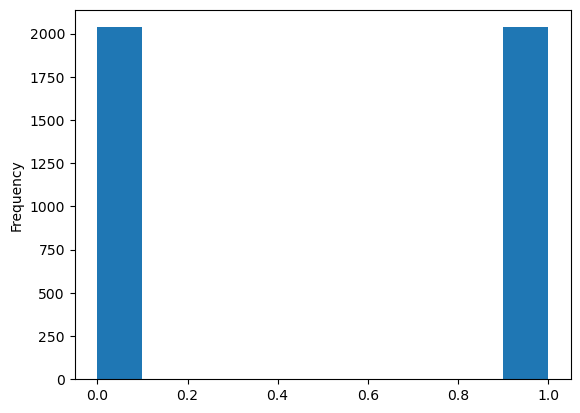

In [119]:
y_rus.plot(kind = 'hist')

# Random Over Sampling

In [120]:
from imblearn.over_sampling import RandomOverSampler

In [121]:
ros = RandomOverSampler(random_state = 2529)

In [122]:
X_ros, y_ros = ros.fit_resample(X, y)

In [123]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [124]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [125]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

y_ros.plot(kind = 'hist')

# Train Test Split

In [126]:
from sklearn.model_selection import train_test_split

# Split Original Data

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=25)

# Split Random Under Sample Data

In [128]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=25)

# Split Random Over Sample Data

In [129]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=25)

# Standardize Features

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
sc = StandardScaler()

# Standardize Original Data

In [132]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance'
                                                                                                 ,'Estimated Salary']])

In [133]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance'
                                                                                                 ,'Estimated Salary']])

# Standardize Random Under Sample Data

In [134]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance'
                                                                                                 ,'Estimated Salary']])

In [135]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance'
                                                                                                 ,'Estimated Salary']])

# Support Vector Machine Classifier

In [136]:
from sklearn.svm import SVC

In [137]:
svc = SVC()

In [138]:
svc.fit(X_train,y_train)

SVC()

In [139]:
y_pred = svc.predict(X_test)

# Model Accuracy

In [140]:
from sklearn.metrics import confusion_matrix, classification_report

In [141]:
confusion_matrix(y_test, y_pred)

array([[2374,   45],
       [ 421,  160]], dtype=int64)

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



# Hyperparameter Tunning

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid = {'C':[0.1,1, 10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [145]:
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose=2, cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [146]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [147]:
grid_predictions = grid.predict(X_test)

In [148]:
confusion_matrix(y_test,grid_predictions)

array([[2166,  253],
       [ 365,  216]], dtype=int64)

In [149]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



# Model With Random Under Sampling

In [150]:
svc_rus = SVC()

In [151]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [152]:
y_pred_rus = svc_rus.predict(X_test_rus)

y_pred_rus = svc_rus.predict(X_test_rus)

# Model Accuracy

In [153]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[248, 355],
       [157, 463]], dtype=int64)

In [154]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.61      0.41      0.49       603
           1       0.57      0.75      0.64       620

    accuracy                           0.58      1223
   macro avg       0.59      0.58      0.57      1223
weighted avg       0.59      0.58      0.57      1223



# Hyperparameter Tunning

In [155]:
param_grid = {'C':[0.1,1, 10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [156]:
grid_rus= GridSearchCV(SVC(),param_grid,refit = True,verbose=2, cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [157]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [158]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [159]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[603,   0],
       [620,   0]], dtype=int64)

In [160]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



C:\Users\NMYad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NMYad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NMYad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model With Random Over Sampling

In [161]:
svc_ros = SVC()

In [162]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [163]:
y_pred_ros = svc_ros.predict(X_test_ros)

# Model Accuracy

In [164]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1854,  572],
       [ 551, 1801]], dtype=int64)

In [165]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2426
           1       0.76      0.77      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.77      0.76      0.76      4778



# Hyperparameter Tunning

In [166]:
param_grid = {'C':[0.1,1, 10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [167]:
grid_ros= GridSearchCV(SVC(),param_grid,refit = True,verbose=2, cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [168]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [169]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [170]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2426
           1       0.86      0.97      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [172]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



In [173]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.61      0.41      0.49       603
           1       0.57      0.75      0.64       620

    accuracy                           0.58      1223
   macro avg       0.59      0.58      0.57      1223
weighted avg       0.59      0.58      0.57      1223



In [174]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



C:\Users\NMYad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NMYad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NMYad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2426
           1       0.76      0.77      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.77      0.76      0.76      4778



In [176]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2426
           1       0.86      0.97      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

